In [1]:
] activate .

  Activating project at `~/Julia`


In [2]:
using AutomaticSingleCellToolbox
using DataFrames

In [3]:
obj = Read10X("A2780_QC_filtered_mean");

[ Info: Currently, only support Cellranger's result!!!
[ Info: Reading matrix directory ...
[ Info: Generating matrix ...
[ Info: Reading barcodes ...
[ Info: Reading features/genes ...
[ Info: Gathering basic information


In [4]:
FeaturePercentage!(obj)

"Finished!"

[ Info: Drawing counts/features hex plot...


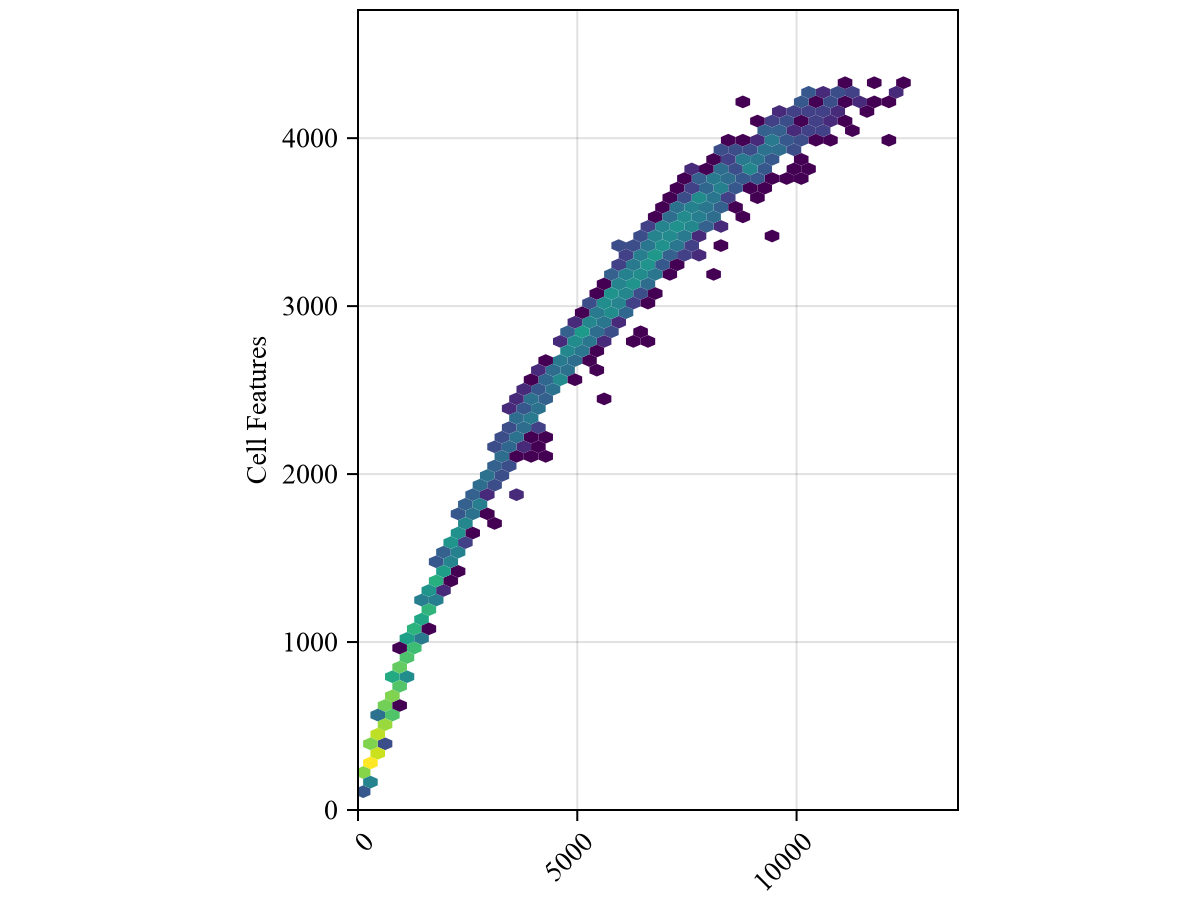

In [6]:
DrawQC(obj; width = 300, height = 400)

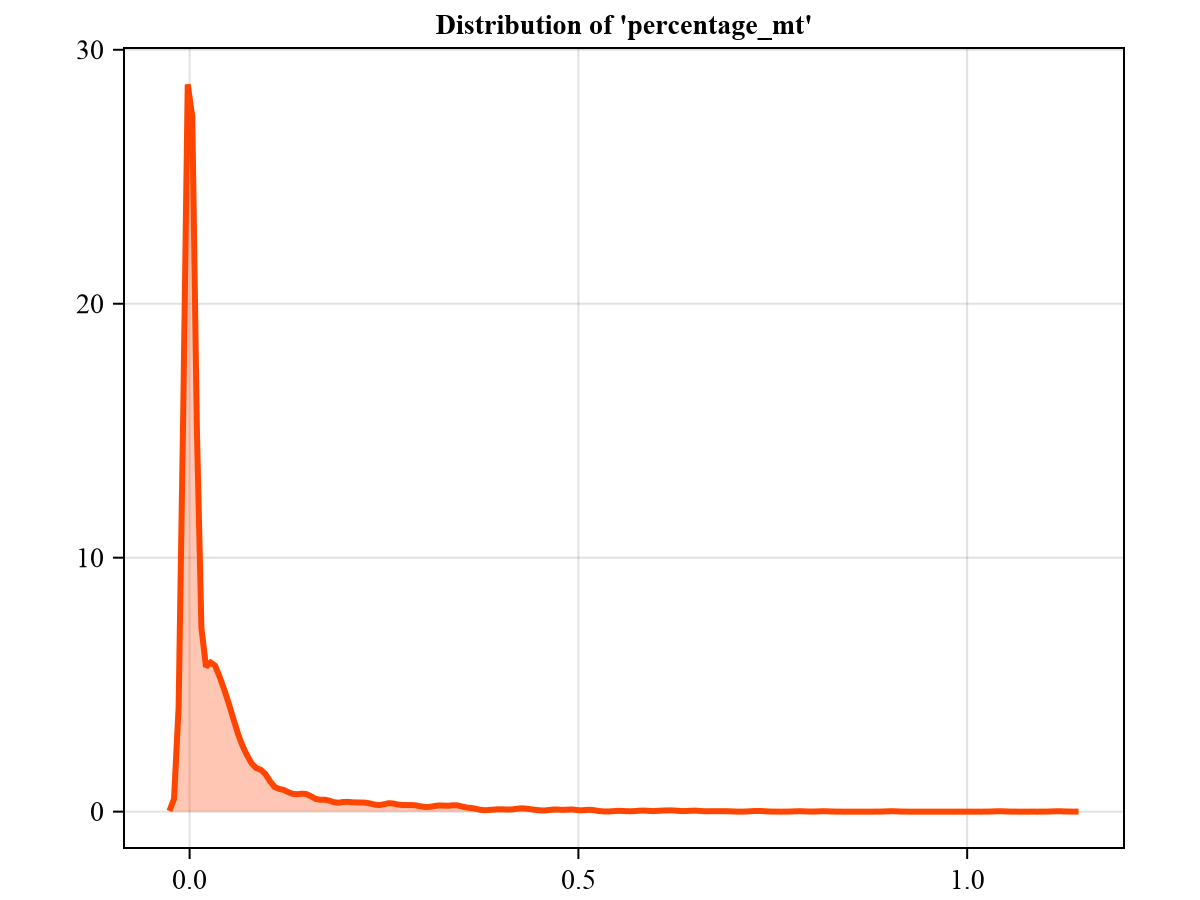

In [60]:
DrawQC(obj; obs_name="percentage_mt", width = 500, height = 400)

In [9]:
obj.obs.Identity = ifelse.(startswith.(obj.obs.barcodes, "A2780S_CT_R"), "A2780S_CT_R", "A2780S_CT_S")

3449-element Vector{String}:
 "A2780S_CT_S"
 "A2780S_CT_S"
 "A2780S_CT_S"
 "A2780S_CT_S"
 "A2780S_CT_S"
 "A2780S_CT_S"
 "A2780S_CT_S"
 "A2780S_CT_S"
 "A2780S_CT_S"
 "A2780S_CT_S"
 "A2780S_CT_S"
 "A2780S_CT_S"
 "A2780S_CT_S"
 ⋮
 "A2780S_CT_R"
 "A2780S_CT_R"
 "A2780S_CT_R"
 "A2780S_CT_R"
 "A2780S_CT_R"
 "A2780S_CT_R"
 "A2780S_CT_R"
 "A2780S_CT_R"
 "A2780S_CT_R"
 "A2780S_CT_R"
 "A2780S_CT_R"
 "A2780S_CT_R"

In [10]:
obj.obs

3449×5 DataFrame
  Row │ barcodes                      cell_counts  cell_features  percentage_m ⋯
      │ String                        Int64        Int64          Float64      ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ A2780S_CT_S_AAACCTGCAGGGTATG         8331           3559      0.012003 ⋯
    2 │ A2780S_CT_S_AAACCTGGTAGCGTCC         6722           3157      0.0
    3 │ A2780S_CT_S_AAACCTGGTATAGGGC          697            605      0.0
    4 │ A2780S_CT_S_AAACCTGGTGAAGGCT          516            472      0.0
    5 │ A2780S_CT_S_AAACCTGGTGCCTTGG          260            244      0.0      ⋯
    6 │ A2780S_CT_S_AAACCTGTCAGTTTGG          504            453      0.0
    7 │ A2780S_CT_S_AAACCTGTCATGCAAC          650            581      0.0
    8 │ A2780S_CT_S_AAACGGGCAAGGTGTG         6199           3122      0.0
    9 │ A2780S_CT_S_AAACGGGCACATCTTT         2925           1908      0.034188 ⋯
   10 │ A2780S_CT_S_AAACGGGCAGGCGATA          965            709      0.103627
   11 │ A2780S_CT_S_AAACGGGTCCGAAGAG          265            254      0.0
  ⋮   │              ⋮                     ⋮             ⋮              ⋮      ⋱
 3440 │ A2780S_CT_R_TTTATGCTCGTTTATC         4988           2763      0.020048
 3441 │ A2780S_CT_R_TTTCCTCAGAGTAATC         8372           3819      0.023889 ⋯
 3442 │ A2780S_CT_R_TTTCCTCGTCTCGTTC          280            276      0.0
 3443 │ A2780S_CT_R_TTTCCTCGTGCACCAC         9771           4058      0.061406
 3444 │ A2780S_CT_R_TTTCCTCTCGCGGATC         2212           1626      0.0
 3445 │ A2780S_CT_R_TTTGCGCAGTAGGTGC         7442           3505      0.026874 ⋯
 3446 │ A2780S_CT_R_TTTGGTTGTTACGTCA          243            230      0.0
 3447 │ A2780S_CT_R_TTTGTCACAACAACCT         8021           3538      0.037401
 3448 │ A2780S_CT_R_TTTGTCAGTCTGGTCG         7782           3547      0.012850
 3449 │ A2780S_CT_R_TTTGTCATCTGAAAGA          530            475      0.0      ⋯
                                                 2 columns and 3428 rows omitted

## Proprecessing 

In [15]:
NormalizeData!(obj)

"Finished!"

In [16]:
SelectHVG!(obj)

[ Info: 2000 HVGs were selected automatically!


"Finished!"

In [17]:
obj.var = sort(obj.var, :hvg_var_std, rev=true)

10425×5 DataFrame
   Row │ id        name      feature_cells  hvg_mean   hvg_var_std 
       │ String    String    Int64          Float64    Float32     
───────┼───────────────────────────────────────────────────────────
     1 │ HIST1H4C  HIST1H4C            730  1.39722      10.5931
     2 │ KCNMA1    KCNMA1              365  0.548565      7.67526
     3 │ NTS       NTS                  49  0.147289      6.99002
     4 │ TMSB4X    TMSB4X              220  0.434619      6.46542
     5 │ MEST      MEST                361  0.323282      6.4249
     6 │ CDKN1A    CDKN1A              410  0.362714      6.3395
     7 │ GCG       GCG                  74  0.0840823     6.33831
     8 │ PEG10     PEG10               203  0.148739      6.14211
     9 │ CTGF      CTGF                 98  0.0864019     5.90796
    10 │ GDF15     GDF15               175  0.131922      5.70861
    11 │ TFPI2     TFPI2                91  0.0669759     5.43272
   ⋮   │    ⋮         ⋮            ⋮            ⋮           ⋮
 10416 │ LAPTM4A   LAPTM4A            2367  2.27805       0.740745
 10417 │ HNRNPM    HNRNPM             2213  2.01827       0.736761
 10418 │ SSB       SSB                2541  2.95187       0.733936
 10419 │ SPCS2     SPCS2              2098  1.65555       0.729412
 10420 │ MORF4L1   MORF4L1            2337  2.58365       0.72941
 10421 │ RARS      RARS               1430  0.660191      0.728771
 10422 │ CCT8      CCT8               2500  2.64048       0.722977
 10423 │ BZW1      BZW1               1915  1.28762       0.720508
 10424 │ CCT4      CCT4               2458  2.4352        0.720106
 10425 │ UQCRC2    UQCRC2             2010  1.44999       0.717619
                                                 10404 rows omitted

In [ ]:
# obj.var = filter(row -> 0.0125 <= row.hvg_mean <= 3.0, obj.var) # the data was ready filtered in mean of each genes

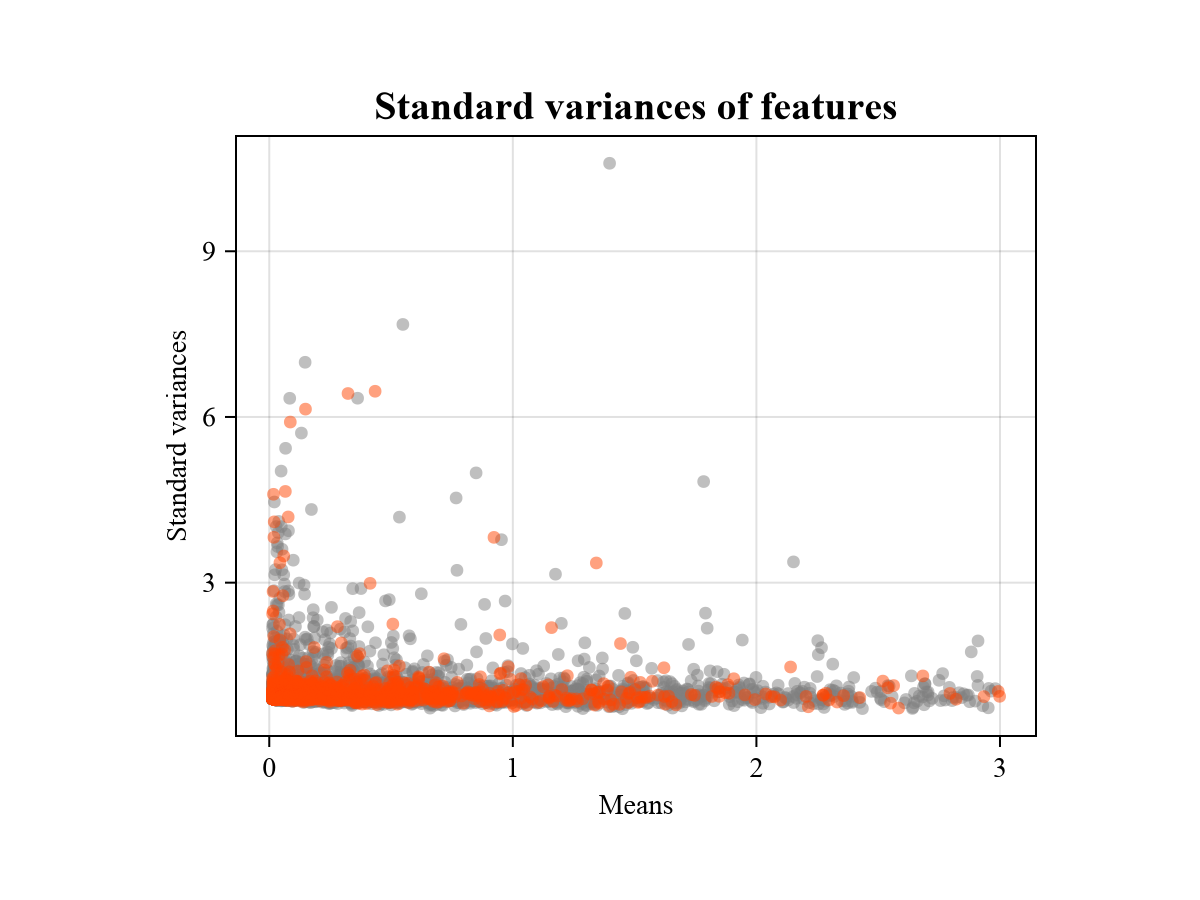

In [18]:
FeatureVariances(obj)

In [19]:
RegressObs!(obj; var = "percentage_mt") 

"Finished!"

In [20]:
RegressObs!(obj; var = "cell_counts")

"Finished!"

## Reduction 

In [21]:
PCA!(obj)

[ Info: Scaling data...
[ Info: Running PCA ...
[ Info: Looking for Elbow threshold...
[ Info: We recommend top 14 PCs for downstream analysis automatically!


"Finished!"

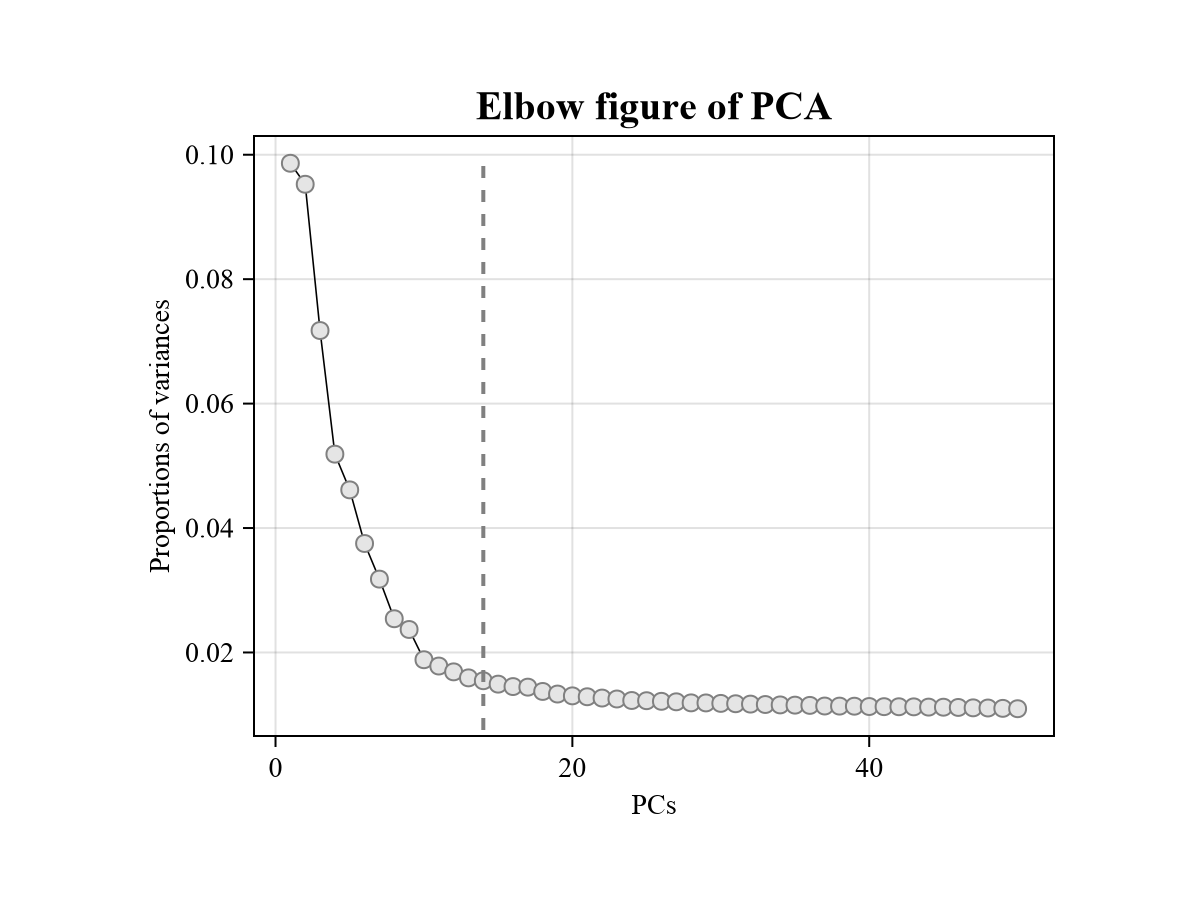

In [61]:
ElbowPCA(obj; path="Elbow_asct.pdf")

In [24]:
FeatureScore!(obj)

"Finished!"

In [25]:
UMAP!(obj)

[ Info: Running UMAP...


"Finished!"

In [26]:
Clustering!(obj)

[ Info: Max modularity: 0.89627194
[ Info: Max modularity: 0.8695105
[ Info: Max modularity: 0.85107875
[ Info: Max modularity: 0.83277005
[ Info: Max modularity: 0.8145299
[ Info: Recommended resolution is 0.5


"Finished!"

In [32]:
obj.log

10-element Vector{AbstractString}:
 "FeaturePercentage!(WsObj;regex=" ⋯ 29 bytes ⋯ "ptr=raw,obs_name=percentage_mt)"
 "NormalizeData!(WsObj;ptr=raw)"
 "SelectHVG!(WsObj;ptr=raw)"
 "RegressObs!(WsObj;var=percentage_mt,use_hvg=false,ptr=norm)"
 "RegressObs!(WsObj;var=cell_counts,use_hvg=false,ptr=norm)"
 "FastRowScale!(WsObj;center=true,scale=truescale_max=10,ptr=regress)"
 "PCA!(WsObj;max_pc=50,use_hvg=true,method=PCA,seed=-1,cut=14,ptr=auto)"
 "FeatureScore!(WsObj;features=Di" ⋯ 527 bytes ⋯ "me=cell_cycle,seed=1,ptr=norm)"
 "UMAP!(WsObj;reduction=pca,use_p" ⋯ 186 bytes ⋯ "_strength=1,neg_sample_rate=5)"
 "Clustering!(WsObj;method = mc,r" ⋯ 185 bytes ⋯ "0.06666666666666667,seed = -1)"

## UMAP plots

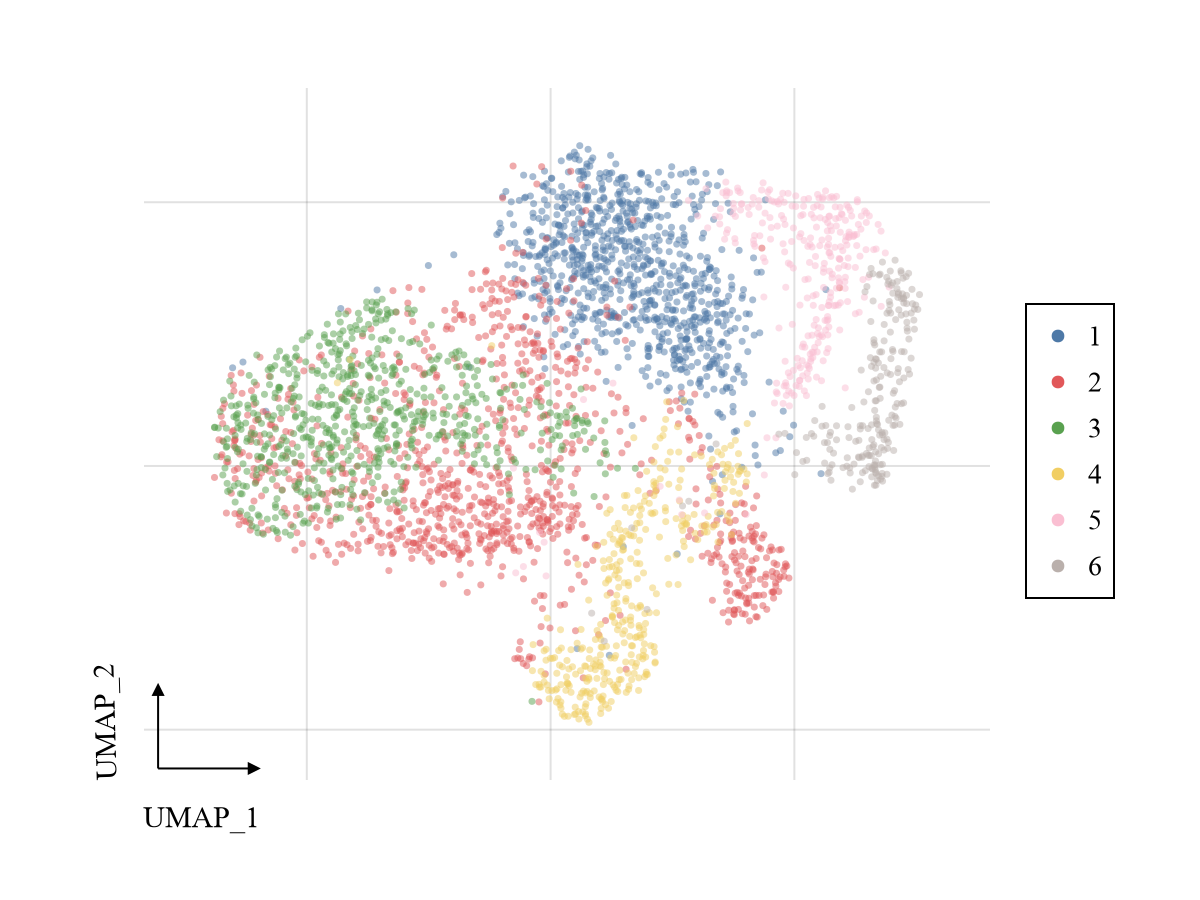

In [49]:
DimensionPoints(obj;path="umap1.pdf", width = 550, height = 450)

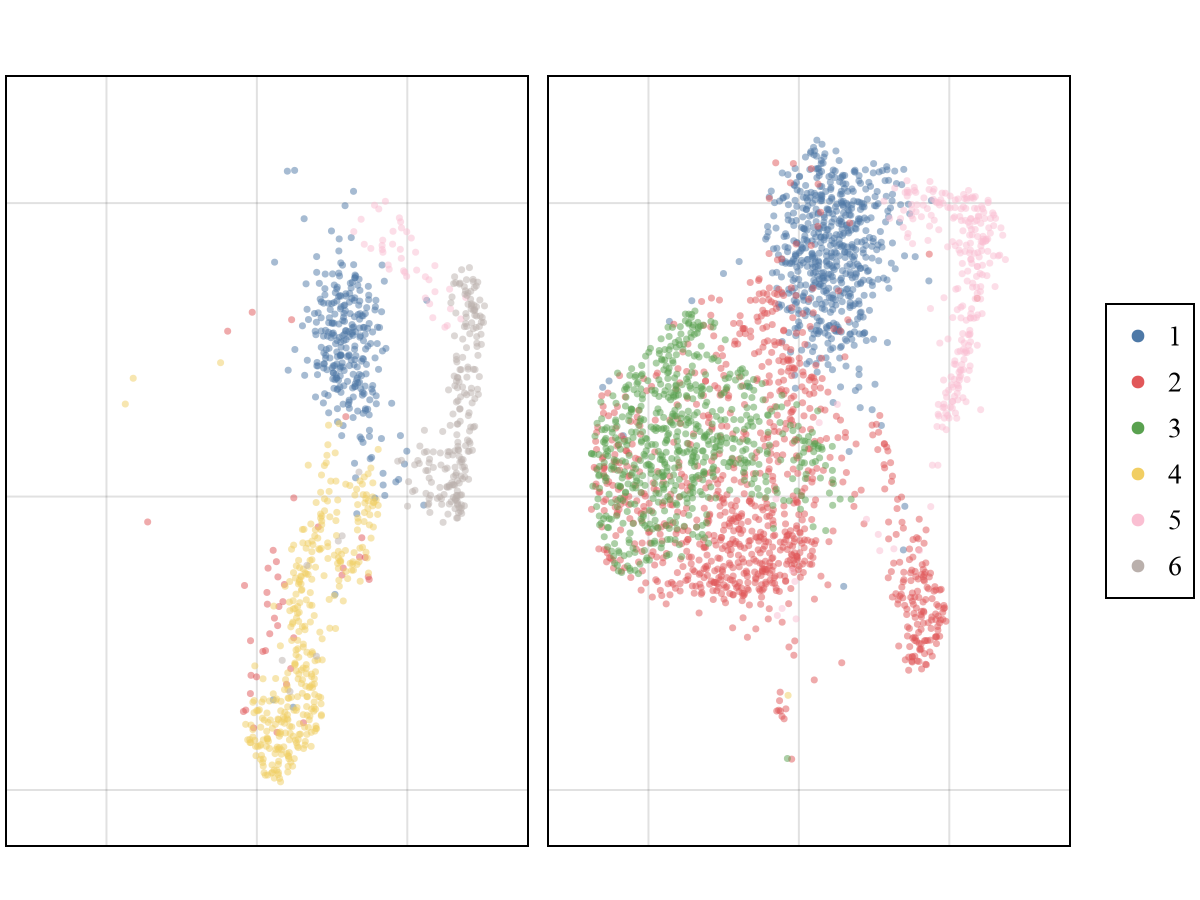

In [45]:
DimensionPoints(obj; split_name = "Identity", path="umap_split.pdf", width = 600, height = 500)

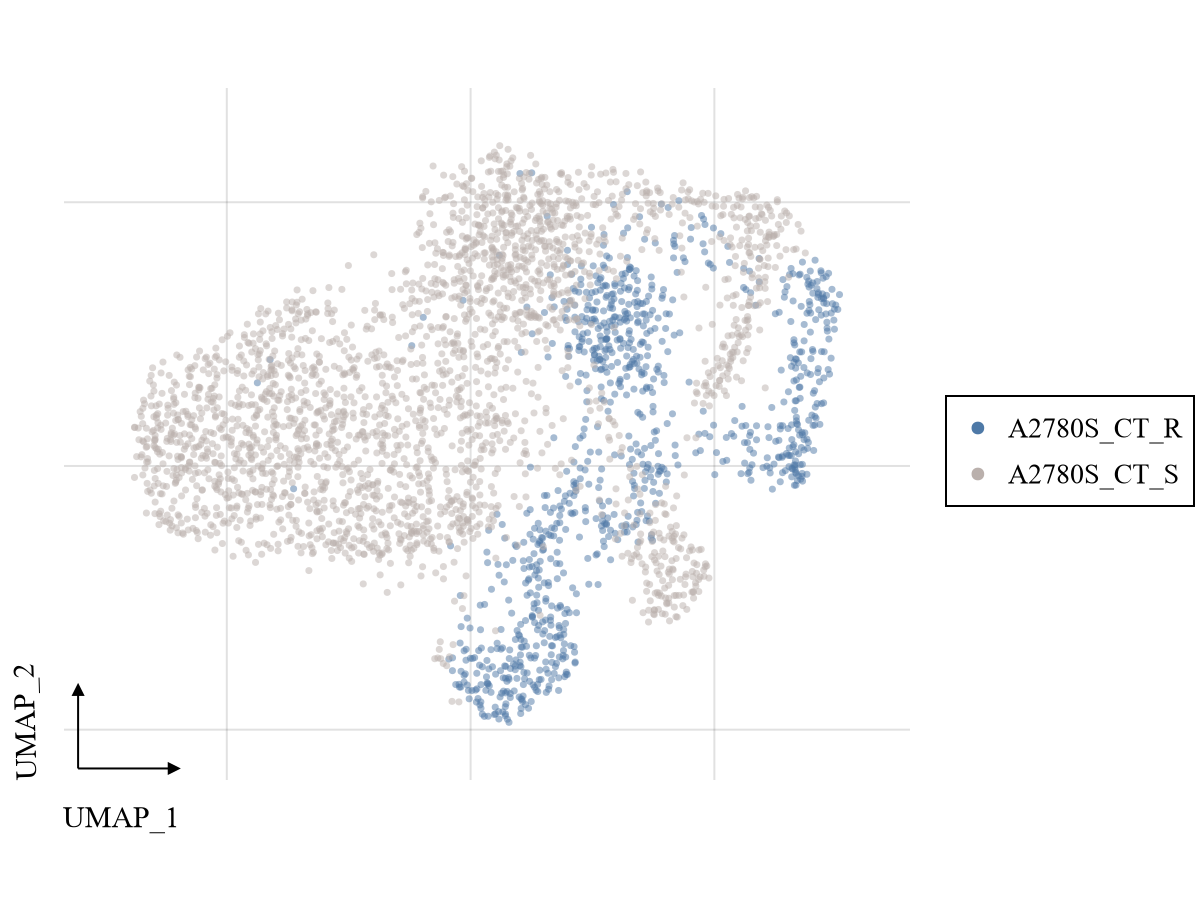

In [48]:
DimensionPoints(obj; group_name = "Identity", path="umap2.pdf", width = 550, height = 450)

## PCA plot

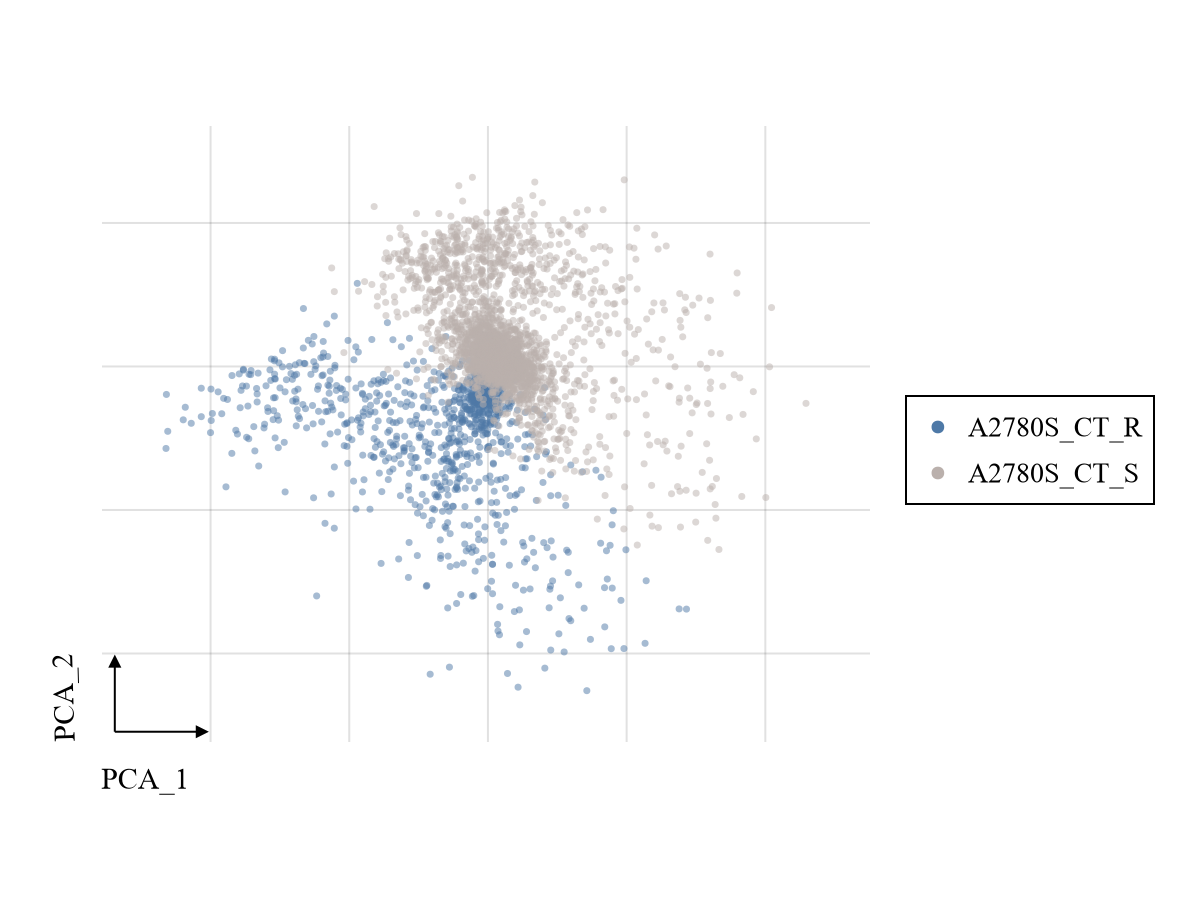

In [41]:
DimensionPoints(obj;dimension_name="pca",group_name = "Identity", path="pca1.pdf", width = 500, height = 400)

## Differential expression analysis

In [50]:
DE!(obj)

"Finished!"

In [51]:
groupby(obj.meta["clusters_latest_DE"],:group) |> 
    x -> combine(x) do y
        first(y,10)
end

60×5 DataFrame
 Row │ group   gene        score      pct1      log2fc   
     │ String  String      Float64    Float64   Float64  
─────┼───────────────────────────────────────────────────
   1 │ 1       MALSU1      0.0319857  0.244344  0.622872
   2 │ 1       TTI1        0.0443578  0.29638   0.604652
   3 │ 1       PCYT2       0.0325135  0.182127  0.602499
   4 │ 1       MRPL57      0.0382047  0.286199  0.582487
   5 │ 1       ASH1L-AS1   0.0314943  0.176471  0.57072
   6 │ 1       RAF1        0.0327935  0.255656  0.554591
   7 │ 1       LINC01006   0.0236272  0.149321  0.534821
   8 │ 1       PMPCA       0.0548519  0.429864  0.522986
   9 │ 1       RHOG        0.0250783  0.211538  0.517199
  10 │ 1       AL451069.1  0.0174371  0.115385  0.517074
  11 │ 2       UROS        0.149064   0.208293  0.761445
  ⋮  │   ⋮         ⋮           ⋮         ⋮         ⋮
  51 │ 6       SPRTN       0.245986   0.747706  2.14108
  52 │ 6       CSPG5       0.144563   0.669725  2.11328
  53 │ 6       PIP5KL1     0.243754   0.284404  1.92175
  54 │ 6       LMF2        0.146394   0.756881  1.89578
  55 │ 6       DGKH        0.165238   0.614679  1.76391
  56 │ 6       DNA2        0.0838286  0.899083  1.67175
  57 │ 6       C20orf96    0.0769096  0.922018  1.63119
  58 │ 6       UTP3        0.125548   0.738532  1.62257
  59 │ 6       CTR9        0.228267   0.197248  1.61339
  60 │ 6       RANBP6      0.0776382  0.894495  1.60666
                                          39 rows omitted

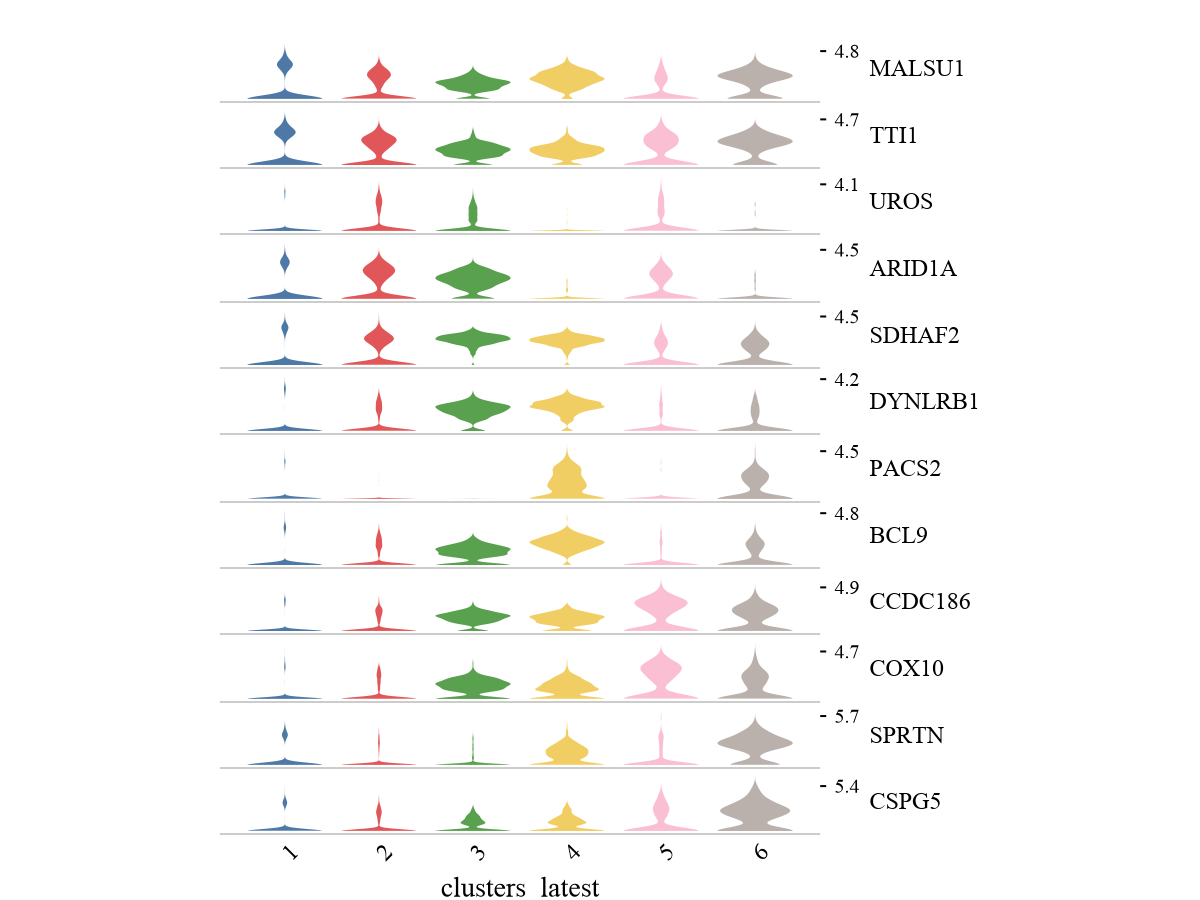

In [55]:
FeatureViolin(obj; width = 300, height = 400 , path="violin_features.pdf")

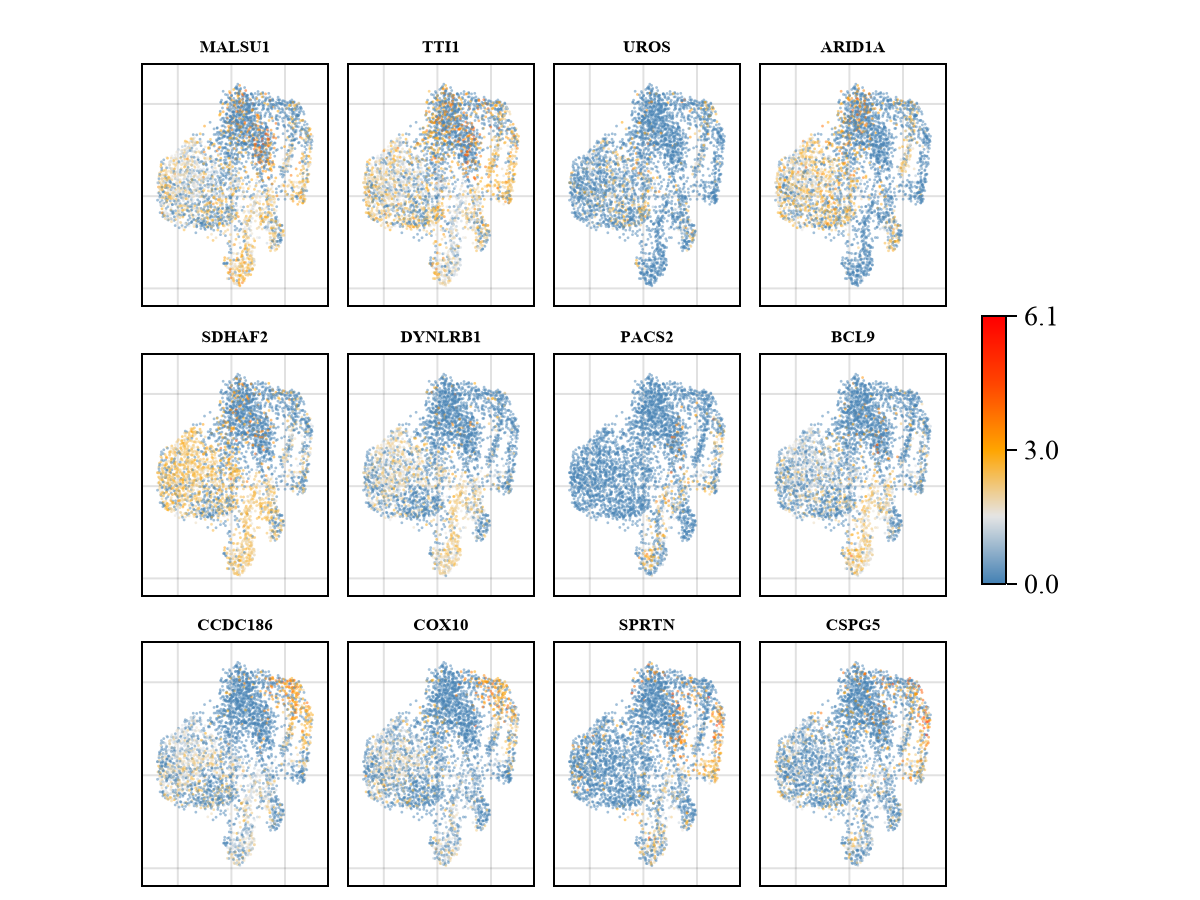

In [162]:
FeatureDimension(obj;point_size=2 , width = 400, height = 400, path = "dimension_plot.pdf")

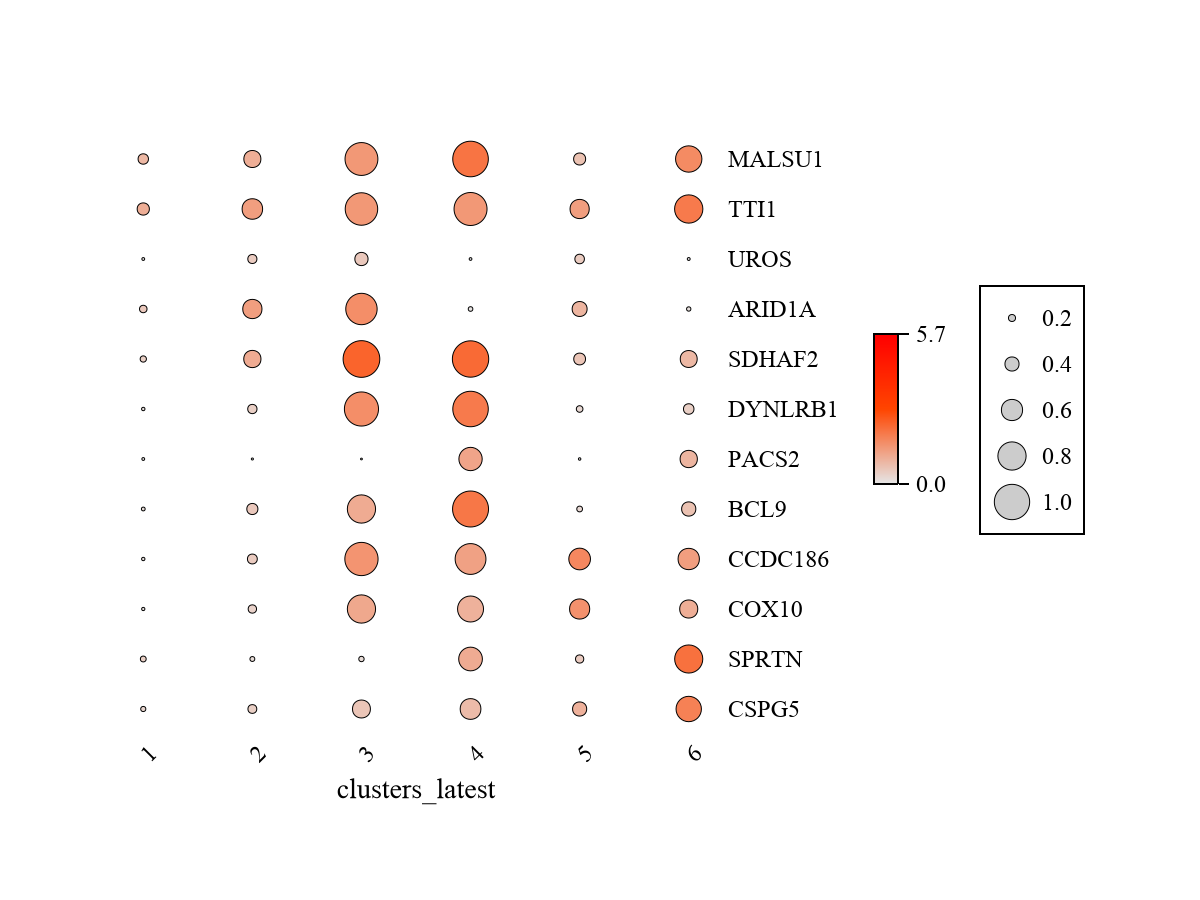

In [155]:
FeatureFracDots(obj; width = 300, height = 300 , circle_size= 25, path = "dot_plot.pdf")

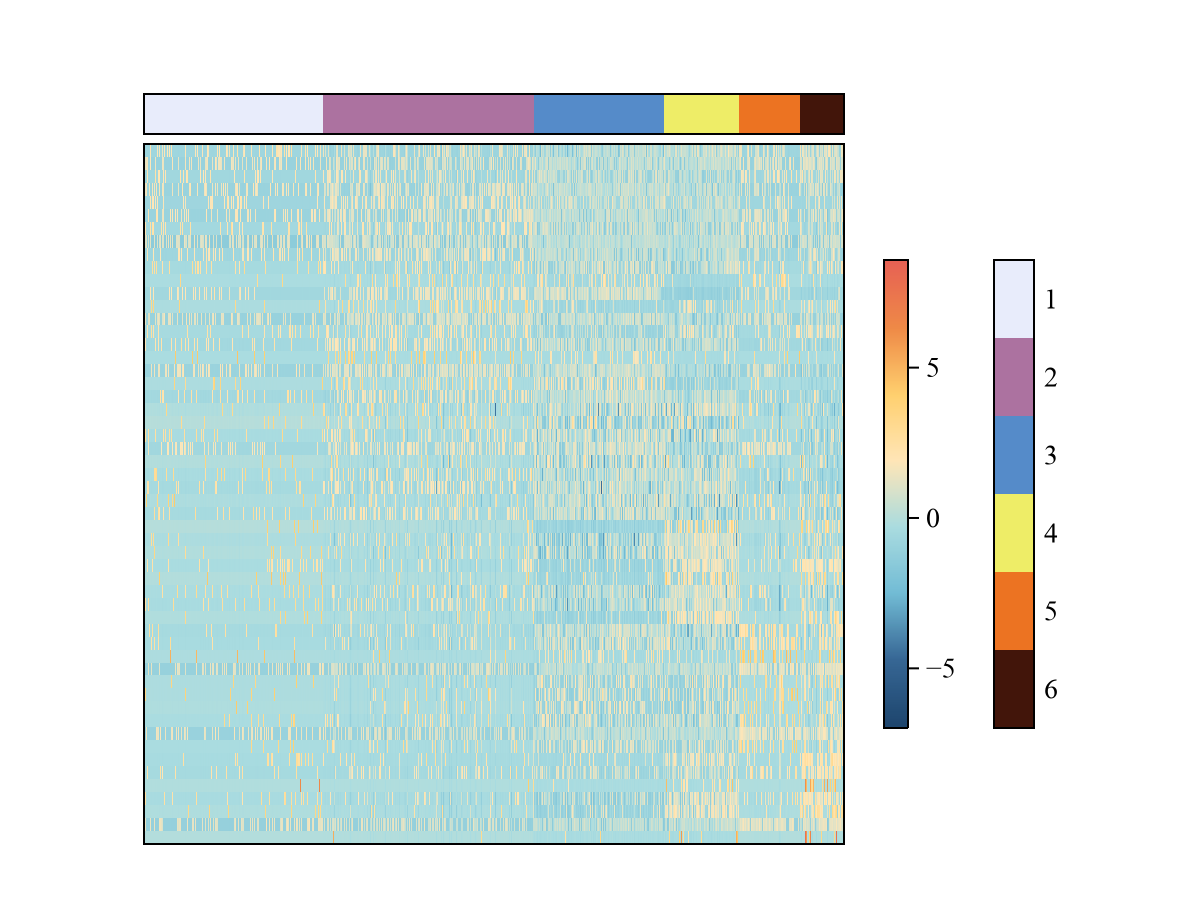

In [59]:
FeatureHeat(obj; width = 350, height = 350) # top 10 DE number of each cell group or the vector of feature names.